# _Coursera-IBM Final Data Science Project_

## Introduction : Problem statement

The objective of this project is to find the safest neighborhood in London considering the number of crimes and level of crime in that particular neighborhood. Besides finding the safety of the neighborhood other facilities and amenities are also considered like parks, shopping malls, theaters, etc.The first priority is given to the safety of a particular neighborhood. After considering the safety, the nighborhoods are clustered to find the best neighborhood suitale for each individuals taste.

### Data

According to my analysis, the factors which may affect the outcome are number of crime, thier types and location details of the neighborhood.

For this project the data which are needed to be obtained are London crime data and foursquare data about the venues and location details of a neighorhood.

London crime data variables are :

+ lsoa_code:- code for Lower Super Output Area in Greater London
+ borough- Borough name
+ major_category:- High level categorization of crime
+ minor_category:- Sub-category within major category
+ value :- monthly reported count of categorical crime in given borough
+ year:- year from 2008 to 2016
+ month:- month from 1 to 12

The crime dataset was downloaded from kaggle, to check click <a href="https://www.kaggle.com/jboysen/london-crime">this</a>.

The wikipedia data about the Boroughs in London can be found <a href="https://en.wikipedia.org/wiki/List_of_London_boroughs">here</a>.

#### Importing all the important modules and libraries.

In [1]:
import numpy as np
import pandas as pd
import json
from geopy.geocoders import Nominatim
import requests
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import folium

###### Getting crime data stored in my local system.....

In [2]:
k=pd.read_csv('~/Desktop/projects/last/london.csv')

In [3]:
k.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [4]:
k.shape

(13490604, 7)

The data set contains 13490604 rows and 7 columns.

In [5]:
k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


##### Renaming the column for better reading.

In [6]:
k.columns=['LSOA_code','Borough','Major_cat','Minor_cat','No_of_crimes','Year','Month']

In [7]:
k.head()

,LSOA_code,Borough,Major_cat,Minor_cat,No_of_crimes,Year,Month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [8]:
k['Borough'].value_counts()

Croydon                   602100
Barnet                    572832
Ealing                    549396
Bromley                   523908
Lambeth                   519048
Enfield                   511164
Wandsworth                498636
Brent                     490644
Lewisham                  485136
Southwark                 483300
Newham                    471420
Redbridge                 445716
Hillingdon                442584
Greenwich                 421200
Hackney                   417744
Haringey                  413856
Tower Hamlets             412128
Waltham Forest            406296
Havering                  399600
Hounslow                  395928
Bexley                    385668
Camden                    378432
Westminster               366660
Harrow                    365688
Islington                 359208
Merton                    339876
Hammersmith and Fulham    328752
Sutton                    322488
Barking and Dagenham      311040
Richmond upon Thames      304128
Kensington

The Croydon borough has the highest number of crimes while the City of London borough has the lowest.

In [9]:
k['Major_cat'].value_counts()

Theft and Handling             3966300
Violence Against the Person    3171744
Criminal Damage                2069172
Drugs                          1179468
Burglary                       1043604
Robbery                         939384
Other Notifiable Offences       776304
Fraud or Forgery                236520
Sexual Offences                 108108
Name: Major_cat, dtype: int64

Most of the major-crimes are <em>theft and Handling</em> while <em>sexual Offences</em> being the least major crime.

Now we can consider the most recent year's data in the data frame, ie 2016.

In [10]:
df=k[k['Year']==2016]

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392042 entries, 9 to 13490538
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   LSOA_code     392042 non-null  object
 1   Borough       392042 non-null  object
 2   Major_cat     392042 non-null  object
 3   Minor_cat     392042 non-null  object
 4   No_of_crimes  392042 non-null  int64 
 5   Year          392042 non-null  int64 
 6   Month         392042 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 23.9+ MB


In [11]:
df.head()

,LSOA_code,Borough,Major_cat,Minor_cat,No_of_crimes,Year,Month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
14,E01002398,Hillingdon,Theft and Handling,Theft/Taking Of Motor Vehicle,0,2016,2


In [12]:
df=df[df['No_of_crimes']!=0]

In [77]:
df.describe()

,No_of_crimes,Year,Month
count,392042.000000,392042.0,392042.000000
mean,1.877659,2016.0,6.543077
std,2.650033,0.0,3.423461
min,1.000000,2016.0,1.000000
25%,1.000000,2016.0,4.000000
50%,1.000000,2016.0,7.000000
75%,2.000000,2016.0,10.000000
max,149.000000,2016.0,12.000000


In [13]:
df.head()

,LSOA_code,Borough,Major_cat,Minor_cat,No_of_crimes,Year,Month
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
32,E01000733,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4
64,E01003989,Southwark,Theft and Handling,Theft From Shops,4,2016,8
112,E01002276,Havering,Burglary,Burglary in a Dwelling,1,2016,8
224,E01003674,Redbridge,Drugs,Possession Of Drugs,2,2016,11


The above dataframe is the dataframe we are going to analyse.

In [14]:
df['Major_cat'].value_counts()

Theft and Handling             129159
Violence Against the Person    123050
Criminal Damage                 48584
Burglary                        43020
Drugs                           21782
Robbery                         14889
Other Notifiable Offences       11558
Name: Major_cat, dtype: int64

From the above data we can understand that Theft and Handling is the crime with largest frequency followed by Violence Against the Person.

###### New table created for better analysis.

In [15]:
l = pd.pivot_table(df,values=['No_of_crimes'],index=['Borough'],columns=['Major_cat'],aggfunc=np.sum,fill_value=0)
l.head()

No_of_crimes                        \
Major_cat                Burglary Criminal Damage Drugs   
Borough                                                   
Barking and Dagenham         1287            1949   919   
Barnet                       3402            2183   906   
Bexley                       1123            1673   646   
Brent                        2631            2280  2096   
Bromley                      2214            2202   728   

                                                                           \
Major_cat            Other Notifiable Offences Robbery Theft and Handling   
Borough                                                                     
Barking and Dagenham                       378     534               5607   
Barnet                                     499     464               9731   
Bexley                                     294     209               4392   
Brent                                      536     919               9026   
Bromley                                    417     369               7584   

                                                  
Major_cat            Violence Against the Person  
Borough                                           
Barking and Dagenham                        6067  
Barnet                                      7499  
Bexley                                      4503  
Brent                                       9205  
Bromley                                     6650

Each Borough with their type of crime and their respective frequencies.

In [16]:
l=l.reset_index()

In [17]:
l['total']=l.sum(axis=1)

In [18]:
l.head()

Borough No_of_crimes                        \
Major_cat                           Burglary Criminal Damage Drugs   
0          Barking and Dagenham         1287            1949   919   
1                        Barnet         3402            2183   906   
2                        Bexley         1123            1673   646   
3                         Brent         2631            2280  2096   
4                       Bromley         2214            2202   728   

                                                                \
Major_cat Other Notifiable Offences Robbery Theft and Handling   
0                               378     534               5607   
1                               499     464               9731   
2                               294     209               4392   
3                               536     919               9026   
4                               417     369               7584   

                                       total  
Major_cat Violence Against the Person         
0                                6067  16741  
1                                7499  24684  
2                                4503  12840  
3                                9205  26693  
4                                6650  20164

##### Boroughs in ascending order of their total crime.

In [19]:
l.sort_values('total').head().reset_index().drop('index',axis=1)

/home/kittu333/.local/lib/python3.6/site-packages/pandas/core/generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


Borough No_of_crimes                        \
Major_cat                           Burglary Criminal Damage Drugs   
0                City of London            2               2    10   
1          Kingston upon Thames          879            1054   743   
2                        Sutton         1233            1316   461   
3          Richmond upon Thames         1359            1148   320   
4                        Merton         1419            1418   466   

                                                                \
Major_cat Other Notifiable Offences Robbery Theft and Handling   
0                                 6       4                129   
1                               189     121               3803   
2                               253     165               3516   
3                               217     106               4769   
4                               249     283               4894   

                                       total  
Major_cat Violence Against the Person         
0                                  25    178  
1                                3194   9983  
2                                3714  10658  
3                                3155  11074  
4                                4026  12755

##### cleanig the data...

In [20]:
l.columns=['Borough','Burglary','Criminal_damage','Drugs','Other_Notifiable_Offences','Robbery','Theft_and_Handling','Violence_Against_the_Person','Total']

In [21]:
l.head()

,Borough,Burglary,Criminal_damage,Drugs,Other_Notifiable_Offences,Robbery,Theft_and_Handling,Violence_Against_the_Person,Total
0,Barking and Dagenham,1287,1949,919,378,534,5607,6067,16741
1,Barnet,3402,2183,906,499,464,9731,7499,24684
2,Bexley,1123,1673,646,294,209,4392,4503,12840
3,Brent,2631,2280,2096,536,919,9026,9205,26693
4,Bromley,2214,2202,728,417,369,7584,6650,20164


#### Plotting a bar chart of Boroughs against their total crime.

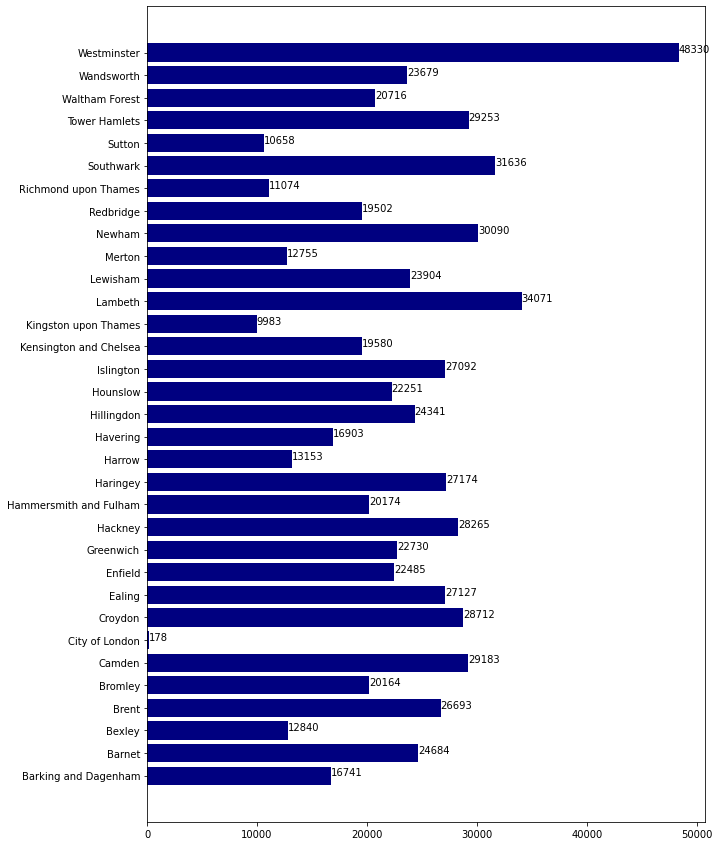

In [22]:
plt.figure(figsize=(10,15)) 
x=l['Borough']
y=l['Total']
plt.barh(x,y,color='navy')

for i,v in enumerate(l['Total']):
    plt.text(v,i,str(v))

<p><b>From the above figure, it is clearly understood that the <i>City of London</i> is the safest Borough in London. <i>Kingston upon Thames</i> can also be considered as safe.The chart also shows that places like <i>Westminster</i> and <i>Lambeth</i> are unsafe comparing with other Boroughs.</b></p>

<p><b><i><u>City of London</u></i> is the safest place in London according to the crime data of the year 2016.But according to wikipedia data, City of London is not a London Borough( for reference follow <a href="https://en.wikipedia.org/wiki/List_of_London_boroughs">this</a>).So the next safest Borough which we can explore is <i><u>Kingston upon Thames</u></i></b><p>

#### Now lets analyse the types of crimes and their frequency in Kingston upon Thames.

In [23]:
city=l.sort_values('Total').iloc[1,1:8]

In [24]:
y=city.values

In [25]:
x=city.index

In [26]:
print(x)

Index(['Burglary', 'Criminal_damage', 'Drugs', 'Other_Notifiable_Offences',
       'Robbery', 'Theft_and_Handling', 'Violence_Against_the_Person'],
      dtype='object')


In [27]:
print(y)

[879 1054 743 189 121 3803 3194]


/home/kittu333/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  """Entry point for launching an IPython kernel.


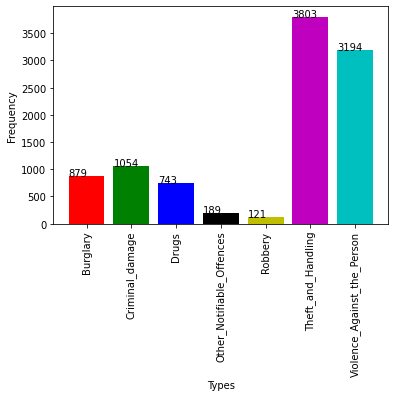

In [28]:
bars = plt.bar(x, height=y,color='rgbkymc',)
xlocs, xlabs = plt.xticks()
xlocs=[i for i in x]
xlabs=[i for i in x]
plt.xlabel('Types')
plt.ylabel('Frequency')
plt.xticks(xlocs, xlabs,rotation='90')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval, yval)

plt.show()

<b>From the above chart it is clearly understood that <i>theft and handling</i> is the most prominent crime occuring in Kingston upon Thames, followed by <i>Violence against the person</i>.

Next, our task is to find the best neighborhood in <b>Kingston upon Thames</b> by comparing the amenities and facilities in these neighorhoods.

### Method

1. Retrieving location data of the respective neighborhoods.
2. Collecting details of all the venue in these neighborhoods.
3. Finding the top 10 venues of these neighborhoods.
4. Clustering them using KMeans algorithm.
5. Selecting the best neighborhood

### Retrieving the neighborhood location data in Kingston upon Thames to find the best neighorhood.

In [29]:
k=pd.DataFrame(index=['Berrylands',
'Canbury',
'Chessington',
'Coombe',
'Kingston upon Thames',
'Kingston Vale',
'Malden Rushett',
'Motspur Park',
'New Malden',
'Norbiton',
'Old Malden',
'Surbiton',
'Tolworth'])

In [30]:
k.reset_index(inplace=True)

In [31]:
k.columns=['Neighborhood']

In [32]:
k['Latitude']=0

In [33]:
k['Longitude']=0

In [34]:
k

,Neighborhood,Latitude,Longitude
0,Berrylands,0,0
1,Canbury,0,0
2,Chessington,0,0
3,Coombe,0,0
4,Kingston upon Thames,0,0
5,Kingston Vale,0,0
6,Malden Rushett,0,0
7,Motspur Park,0,0
8,New Malden,0,0
9,Norbiton,0,0


In [41]:
latitude=[]
longitude=[]
geolocator = Nominatim(user_agent='London_agent')
for i in k.Neighborhood:
    address=i
    location=geolocator.geocode(address)
    latitude.append(location.latitude)
    longitude.append(location.longitude)
print(latitude)
print(longitude)

[51.3937811, 51.41749865, 51.358336, 50.8781557, 51.4096275, 51.43185, 51.3410523, 51.3909852, 51.4053347, 51.4099994, 51.382484, 51.3937557, 51.3788758]
[-0.2848024, -0.30555280504926163, -0.2986216, -4.547739, -0.3062621, -0.2581379, -0.3190757, -0.2488979, -0.2634066, -0.2873963, -0.2590897, -0.3033105, -0.2828604]


In [42]:
k['Latitude']=latitude
k['Longitude']=longitude
k

,Neighborhood,Latitude,Longitude
0,Berrylands,51.393781,-0.284802
1,Canbury,51.417499,-0.305553
2,Chessington,51.358336,-0.298622
3,Coombe,50.878156,-4.547739
4,Kingston upon Thames,51.409627,-0.306262
5,Kingston Vale,51.431850,-0.258138
6,Malden Rushett,51.341052,-0.319076
7,Motspur Park,51.390985,-0.248898
8,New Malden,51.405335,-0.263407
9,Norbiton,51.409999,-0.287396


In [43]:
add='Kingston upon Thames'
g = Nominatim(user_agent='kut')
loc=g.geocode(add)
lat=loc.latitude
lon=loc.longitude

In [44]:
maplon=folium.Map(location=[lat,lon],zoom_start=11)
for i,j,l in zip(k['Latitude'],k['Longitude'],k['Neighborhood']):
    l=folium.Popup(l,parse_html=True)
    folium.CircleMarker([i,j],
                        radius=4,
                        popup=l,
                        color='green',
                        fill=True,
                        fill_color='yellow',
                        fill_opacity=1.5,
                        parse_html=True).add_to(maplon)
maplon

### Retrieving venue details in each neighbourhood.

#### Foursquare client details

In [45]:
CLIENT_ID = 'YHUXBUVI4ZE0AYOL2UX5PIFUVFE2D05JIH5E1BDFWHAZI05P' 
CLIENT_SECRET = 'MPTRVQ500LBJA2MYDJSLDPAQ2014T33XZEKVS0X3CDL35CIH'
VERSION = '20180605'
radius=500
LIMIT=300

In [48]:
def getvenues(names, latitudes, longitudes, radius=500):
    vlist=[]
    for name,la,lo in zip(names,latitudes,longitudes):
        url='https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit{}'.format(CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            la, 
            lo, 
            radius, 
            LIMIT)
        res=requests.get(url).json()["response"]['groups'][0]['items']
        vlist.append([(
            name, 
            la, 
            lo, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in res])
    nvenues = pd.DataFrame([item for vlist in vlist for item in vlist])
    nvenues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    return (nvenues)

In [49]:
thamesvenues = getvenues(names=k['Neighborhood'],
                                   latitudes=k['Latitude'],
                                   longitudes=k['Longitude']
                                  )

In [50]:
t=thamesvenues

In [51]:
thamesvenues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Berrylands,51.393781,-0.284802,Surbiton Racket & Fitness Club,51.392676,-0.290224,Gym / Fitness Center
1,Berrylands,51.393781,-0.284802,Alexandra Park,51.394230,-0.281206,Park
2,Berrylands,51.393781,-0.284802,K2 Bus Stop,51.392302,-0.281534,Bus Stop
3,Berrylands,51.393781,-0.284802,Kamala Food and Wine,51.397810,-0.284045,Wine Shop
4,Canbury,51.417499,-0.305553,Canbury Gardens,51.417409,-0.305300,Park


In [52]:
thamesvenues.shape

(147, 7)

In [53]:
thamesvenues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berrylands,4,4,4,4,4,4
Canbury,14,14,14,14,14,14
Chessington,1,1,1,1,1,1
Coombe,1,1,1,1,1,1
Kingston Vale,4,4,4,4,4,4
Kingston upon Thames,30,30,30,30,30,30
Malden Rushett,4,4,4,4,4,4
Motspur Park,5,5,5,5,5,5
New Malden,7,7,7,7,7,7


### One hot encoding

In [54]:
print('Numer of unique categories:- {}'.format(len(thamesvenues['Venue Category'].unique())))

Numer of unique categories:- 65


In [55]:
# one hot encoding
thames_onehot = pd.get_dummies(thamesvenues[['Venue Category']],prefix="", prefix_sep="")
thames_onehot.insert(0,'Neighborhood',thamesvenues[['Neighborhood']])

In [56]:
thames_onehot.head()

,Neighborhood,Asian Restaurant,Auto Garage,Bakery,Bar,Beach,Beer Bar,Bistro,Bowling Alley,Breakfast Spot,...,Shop & Service,Soccer Field,Spa,Supermarket,Sushi Restaurant,Tea Room,Thai Restaurant,Theater,Train Station,Wine Shop
0,Berrylands,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Berrylands,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Berrylands,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Berrylands,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,Canbury,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
thamesg=thames_onehot.groupby('Neighborhood').mean().reset_index()

In [58]:
thamesg.head()

,Neighborhood,Asian Restaurant,Auto Garage,Bakery,Bar,Beach,Beer Bar,Bistro,Bowling Alley,Breakfast Spot,...,Shop & Service,Soccer Field,Spa,Supermarket,Sushi Restaurant,Tea Room,Thai Restaurant,Theater,Train Station,Wine Shop
0,Berrylands,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.25
1,Canbury,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.071429,0.00,0.071429,0.071429,0.0,0.0,0.0,0.0,0.0,0.00
2,Chessington,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00
3,Coombe,0.0,0.0,0.0,0.00,1.0,0.0,0.0,0.0,0.0,...,0.000000,0.00,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00
4,Kingston Vale,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.25,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00


### Finding the most common venues

In [59]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]

In [60]:
num_top_venues = 10
indicators = ['st', 'nd', 'rd']
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = thamesg['Neighborhood']
for ind in np.arange(thamesg.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(thamesg.iloc[ind, :], num_top_venues)
neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berrylands,Wine Shop,Gym / Fitness Center,Park,Bus Stop,Farmers Market,Cosmetics Shop,Deli / Bodega,Department Store,Electronics Store,Fish & Chips Shop
1,Canbury,Pub,Hotel,Gym / Fitness Center,Plaza,Café,Indian Restaurant,Shop & Service,Park,Spa,Supermarket
2,Chessington,Construction & Landscaping,Wine Shop,Grocery Store,Gastropub,Garden Center,Furniture / Home Store,Fried Chicken Joint,French Restaurant,Food,Fish & Chips Shop
3,Coombe,Beach,Wine Shop,Construction & Landscaping,Gastropub,Garden Center,Furniture / Home Store,Fried Chicken Joint,French Restaurant,Food,Fish & Chips Shop
4,Kingston Vale,Grocery Store,Bar,Soccer Field,Sandwich Place,Fish & Chips Shop,Cosmetics Shop,Deli / Bodega,Department Store,Electronics Store,Farmers Market


The top 10 venues of each neighborhood in Kingston upon Thames is found. Now we can apply <b>Machine Learning Algorithm</b> to find identical neighbourhoods.
For this we can use a <i><u><a href="https://en.wikipedia.org/wiki/K-means_clustering">KMeans clustering algorithm</a></u></i> which is an unsupervised machine leraning algorithhm.

## Applying ML algorithm.

In [61]:
from sklearn.cluster import KMeans

In [62]:
kclusters=5
thames_clust=thamesg.drop('Neighborhood',axis=1)
kmeans=KMeans(n_clusters=kclusters,random_state=0)
kmeans.fit(thames_clust)
kmeans.labels_

array([3, 0, 2, 1, 4, 0, 0, 3, 0, 0, 0, 0, 0], dtype=int32)

In [63]:
neighborhoods_venues_sorted.insert(1,'Labels',kmeans.labels_)

In [64]:
neighborhoods_venues_sorted.head()

,Neighborhood,Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berrylands,3,Wine Shop,Gym / Fitness Center,Park,Bus Stop,Farmers Market,Cosmetics Shop,Deli / Bodega,Department Store,Electronics Store,Fish & Chips Shop
1,Canbury,0,Pub,Hotel,Gym / Fitness Center,Plaza,Café,Indian Restaurant,Shop & Service,Park,Spa,Supermarket
2,Chessington,2,Construction & Landscaping,Wine Shop,Grocery Store,Gastropub,Garden Center,Furniture / Home Store,Fried Chicken Joint,French Restaurant,Food,Fish & Chips Shop
3,Coombe,1,Beach,Wine Shop,Construction & Landscaping,Gastropub,Garden Center,Furniture / Home Store,Fried Chicken Joint,French Restaurant,Food,Fish & Chips Shop
4,Kingston Vale,4,Grocery Store,Bar,Soccer Field,Sandwich Place,Fish & Chips Shop,Cosmetics Shop,Deli / Bodega,Department Store,Electronics Store,Farmers Market


In [65]:
thames=k
thames=thames.join(neighborhoods_venues_sorted.set_index('Neighborhood'),on='Neighborhood')
thames.head()

,Neighborhood,Latitude,Longitude,Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berrylands,51.393781,-0.284802,3,Wine Shop,Gym / Fitness Center,Park,Bus Stop,Farmers Market,Cosmetics Shop,Deli / Bodega,Department Store,Electronics Store,Fish & Chips Shop
1,Canbury,51.417499,-0.305553,0,Pub,Hotel,Gym / Fitness Center,Plaza,Café,Indian Restaurant,Shop & Service,Park,Spa,Supermarket
2,Chessington,51.358336,-0.298622,2,Construction & Landscaping,Wine Shop,Grocery Store,Gastropub,Garden Center,Furniture / Home Store,Fried Chicken Joint,French Restaurant,Food,Fish & Chips Shop
3,Coombe,50.878156,-4.547739,1,Beach,Wine Shop,Construction & Landscaping,Gastropub,Garden Center,Furniture / Home Store,Fried Chicken Joint,French Restaurant,Food,Fish & Chips Shop
4,Kingston upon Thames,51.409627,-0.306262,0,Café,Coffee Shop,Pub,Sushi Restaurant,Burger Joint,French Restaurant,German Restaurant,Electronics Store,Department Store,Cosmetics Shop


### Map of Kingston upon Thames after clustering.

In [66]:
map_clusters = folium.Map(location=[lat, lon], zoom_start=11)
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
markers_colors = []
for lat, lon, poi, cluster in zip(thames['Latitude'], thames['Longitude'], thames['Neighborhood'], thames['Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Cluster 1.

In [69]:
thames.loc[thames['Labels'] == 0, thames.columns[[0] + list(range(4, thames.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Canbury,Pub,Hotel,Gym / Fitness Center,Plaza,Café,Indian Restaurant,Shop & Service,Park,Spa,Supermarket
4,Kingston upon Thames,Café,Coffee Shop,Pub,Sushi Restaurant,Burger Joint,French Restaurant,German Restaurant,Electronics Store,Department Store,Cosmetics Shop
6,Malden Rushett,Grocery Store,Garden Center,Pub,Restaurant,Electronics Store,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Farmers Market
8,New Malden,Indian Restaurant,Gastropub,Chinese Restaurant,Bar,Sushi Restaurant,Supermarket,Korean Restaurant,Farmers Market,Deli / Bodega,Department Store
9,Norbiton,Pub,Food,Indian Restaurant,Italian Restaurant,Platform,Wine Shop,Hardware Store,Hotel,Japanese Restaurant,Convenience Store
10,Old Malden,Train Station,Food,Pub,Construction & Landscaping,Furniture / Home Store,Fried Chicken Joint,French Restaurant,Garden Center,Coffee Shop,Farmers Market
11,Surbiton,Coffee Shop,Pub,Grocery Store,Italian Restaurant,Pharmacy,Breakfast Spot,Deli / Bodega,French Restaurant,Hotel,Gym / Fitness Center
12,Tolworth,Grocery Store,Pharmacy,Pizza Place,Sandwich Place,Train Station,Hotel,Indian Restaurant,Coffee Shop,Café,Bus Stop


### Cluster 2.

In [70]:
thames.loc[thames['Labels'] == 1, thames.columns[[0] + list(range(4, thames.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Coombe,Beach,Wine Shop,Construction & Landscaping,Gastropub,Garden Center,Furniture / Home Store,Fried Chicken Joint,French Restaurant,Food,Fish & Chips Shop


### Cluster 3.

In [71]:
thames.loc[thames['Labels'] == 2, thames.columns[[0] + list(range(4, thames.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Chessington,Construction & Landscaping,Wine Shop,Grocery Store,Gastropub,Garden Center,Furniture / Home Store,Fried Chicken Joint,French Restaurant,Food,Fish & Chips Shop


### Cluster 4.

In [72]:
thames.loc[thames['Labels'] == 3, thames.columns[[0] + list(range(4, thames.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berrylands,Wine Shop,Gym / Fitness Center,Park,Bus Stop,Farmers Market,Cosmetics Shop,Deli / Bodega,Department Store,Electronics Store,Fish & Chips Shop
7,Motspur Park,Gym,Park,Bus Stop,Restaurant,Soccer Field,Electronics Store,Cosmetics Shop,Deli / Bodega,Department Store,Farmers Market


### Cluster 5

In [73]:
thames.loc[thames['Labels'] == 4, thames.columns[[0] + list(range(4, thames.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Kingston Vale,Grocery Store,Bar,Soccer Field,Sandwich Place,Fish & Chips Shop,Cosmetics Shop,Deli / Bodega,Department Store,Electronics Store,Farmers Market


<b>The 12 Neighborhoods are clustered into 5 clusters based on some similar characteristics. I experimented with different range of clusters from 1 to 7 and found out that 5 is one of the optimal number of clusters.</b>

## Results and  Discussion.

The main objective of this project was to help people who are planning to relocate in London but don't know where in London based on safety and their interests.<br>
The <b>first phase</b> of the project was to understanding, preparing and cleaning of the huge datasets. In this project we only considered the most recent and relevant data from the crime dataset.Then we applied small statistics upon the data to find the overall behaviour and structure of data.<br>
The <b>second phase</b> of the project was to find the safest Borough in London. In the analysis we found out that City of London is the safest one followed by Kingston upon Thames. We also found out that Westmister and Lambeth are some of the places which has very high crime numbers. We couldn't explore City of London as it is not considered as a Borough according to wikipedia data. So, we explored the Borough, Kingston upon Thames. There we found out that theft and handling is the most prominent crime occuring in Kingston upon Thames, followed by violence against the person. We clarified it through a bar chart.<br>
The <b>third phase</b> of the project was to find the different neighborhoods in the borough, Kingston upon Thames, retrieve their respective venues, find the top 10 venues of each of them and to cluster them according to similar properties.We retrieved the neighborhood data using geopy package, a geocoding library. Venue data was retrieved by using Foursquare API. And clustering ML algorithm that is used here is KMeans algorithm.<br>


Following are the 5 clusters which would help people select neighborhood according to their interests and way of living.

1. The first cluster consist of neighborhoods where there are many varieties of restaurants, pubs, clubs, etc and has all the amenities. This cluster also has the most number of neighborhoods with 8 neighborhood.
2. The second cluster consist of a single neighborhood and it is the only neighborhood with  beach as frequently visisted place.
3. The third cluster consist of construction & Landscaping,	Wine Shops etc. It consist of a single neighborhood.
4. The fourth cluster consist of 2 neighborhoods with parks, gym, wine shops, etc being frequently visited venues.
5. The fifth and final cluster consist of a single neighborhood with grocery store, bar, soccer field, etc being the most visited venues.
<br>
And, I personally prefer the final cluster (fifth) ie Kingston Vale	 .

# Conclusion

The project is about finding the best neighorhood in London with least crime number and with different types of amenities and facilities. However, the project only deals with the above mentioned criterias and does not consider the value of the property, taxes and laws, employability, etc. For that another project these criterias and parameters can be considered.

-----------------------------------------------Thank You----------------------------------------------------------